## Irreducible active flows in unbounded domain

The expression of fluid flow can be written in terms of modes of the force per unit area and surface slip. These include

$$\boldsymbol{v}^{1s}(\boldsymbol{r})=-(1+\tfrac{b^{2}}{6}\nabla^{2})\,\mathbf{G}\cdot\mathbf{F}^{(1s)},$$
$$\boldsymbol{v}^{2s}(\boldsymbol{r})=\tfrac{28\pi\eta b^{2}}{3}(1+\tfrac{b^{2}}{10}\nabla^{2})\,\boldsymbol{\nabla}\mathbf{G}\cdot\mathbf{V}^{(2s)},$$
$$\boldsymbol{v}^{3t}(\boldsymbol{r})=\tfrac{2\pi\eta b^{3}}{5}\nabla^{2}\mathbf{G}\cdot\mathbf{V}^{(3t)}$$

We emphasise that these expressions are valid for any Green's function of the Stokes equation, provided they satisfy the additional boundary conditions that may be imposed. For this example, we choose an unbounded domain with the flow vanishing at infinity, for which the Green's function is the Oseen tensor,

$$G_{\alpha\beta}^{\text{o}}(\boldsymbol{r}-\boldsymbol{r}^{\prime})=\frac{1}{8\pi\eta}\left(\nabla^{2}\delta_{\alpha\beta}-\nabla_{\alpha}\nabla_{\beta}\right)|\boldsymbol{r}-\boldsymbol{r}^{\prime}|. $$

In [1]:
# ex1 : flow around an active colloid in an unbounded domain

%matplotlib inline
import pystokes
import numpy as np, matplotlib.pyplot as plt

In [2]:
# particle radius, fluid viscosity, and number of particles
b, eta, N = 1.0, 1.0/6.0, 1

#initialise position, orientation and body force on the colloid
r, p, F = np.array([0.0, 0.0, 0.0]), np.array([0.0, 1.0, 0]),  np.array([0.0, 1.0, 0])

# irreducible coeffcients
V2s = pystokes.utils.irreducibleTensors(2, p)
V3t = pystokes.utils.irreducibleTensors(1, p)

In [3]:
# space dimension , extent , discretization
dim, L, Ng = 3, 10, 100;

# instantiate the Flow class
flow = pystokes.unbounded.Flow(radius=b, particles=N, viscosity=eta, gridpoints=Ng*Ng)
V2s

array([-0.33333333,  0.66666667,  0.        ,  0.        ,  0.        ])

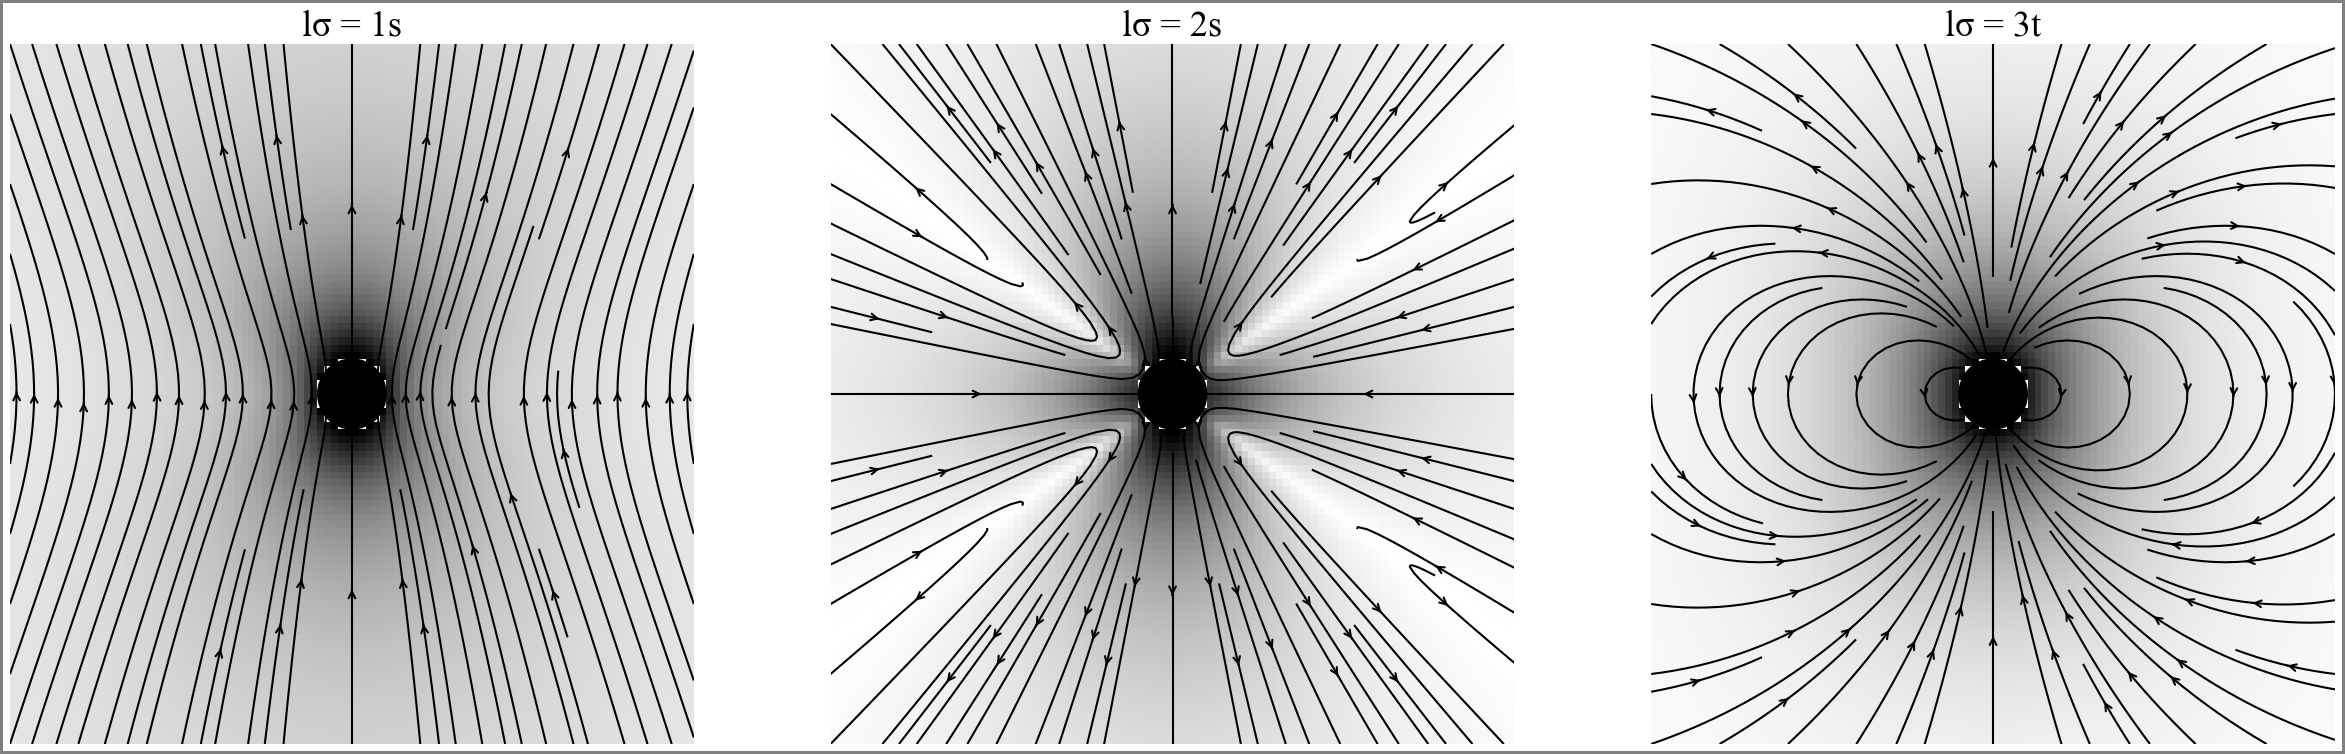

In [7]:
plt.figure(figsize=(30, 20), edgecolor='gray', linewidth=4)
plt.rcParams["font.family"] = "Times New Roman"

# create the grid
rr, vv = pystokes.utils.gridXY(dim, L, Ng)

plt.subplot(231);  vv=vv*0; 
flow.flowField1s(vv, rr, r, F)  
pystokes.utils.plotStreamlinesXY(vv, rr, r, offset=6e-1, title='lσ = 1s', density=2)

plt.subplot(232);   vv=vv*0; 
flow.flowField2s(vv, rr, r, V2s)  
pystokes.utils.plotStreamlinesXY(vv, rr, r, offset=4e-2, title='lσ = 2s', density=2)

plt.subplot(233); vv=vv*0; 
flow.flowField3t(vv, rr, r, V3t)  
pystokes.utils.plotStreamlinesXY(vv, rr, r, offset=4e-4, title='lσ = 3t', density=2)